In [6]:
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pa.read_csv('scrubbed.csv')
df = df.fillna(value=0)

In [8]:
df['datetime'] = pa.to_datetime(df['datetime'],errors='coerce')

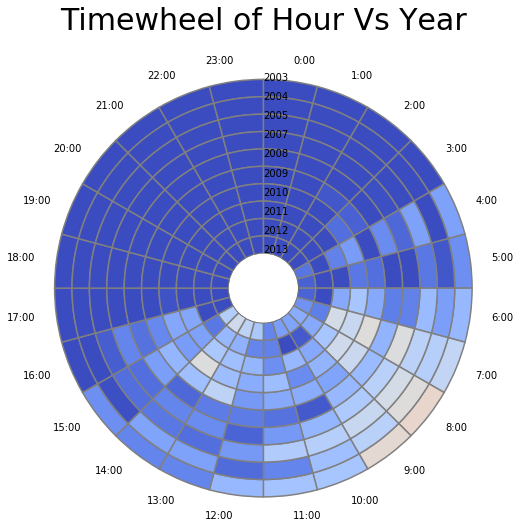

In [10]:
df['datetime'] = df['datetime'].astype('datetime64[ns]')
most_sightings_years = df['datetime'].dt.year.value_counts().head(10)
def is_top_years(year):
    if year in most_sightings_years.index:
        return year
    

hour_vs_year = df.pivot_table(columns=df['datetime'].dt.hour,index=df['datetime'].dt.year.apply(is_top_years),aggfunc='count',values='city')
hour_vs_year.columns = hour_vs_year.columns.astype(int)
hour_vs_year.columns = hour_vs_year.columns.astype(str) + ":00"
hour_vs_year.index = hour_vs_year.index.astype(int)


def pie_heatmap(table, cmap='coolwarm_r', vmin=None, vmax=None,inner_r=0.25):
    n, m = table.shape
    vmin= table.min().min() if vmin is None else vmin
    vmax= table.max().max() if vmax is None else vmax

    centre_circle = plt.Circle((0,0),inner_r,edgecolor='black',facecolor='white',fill=True,linewidth=0.25)
    plt.gcf().gca().add_artist(centre_circle)
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    cmapper = cm.ScalarMappable(norm=norm, cmap=cmap)
  
    for i, (row_name, row) in enumerate(table.iterrows()):
        labels = None if i > 0 else table.columns
        wedges = plt.pie([1] * m,radius=inner_r+float(n-i)/n, colors=[cmapper.to_rgba(x) for x in row.values], 
            labels=labels, startangle=90, counterclock=False, wedgeprops={'linewidth':-1})
        plt.setp(wedges[0], edgecolor='grey',linewidth=1.5)
        wedges = plt.pie([1], radius=inner_r+float(n-i-1)/n, colors=['w'], labels=[row_name], startangle=-90, wedgeprops={'linewidth':0})
        plt.setp(wedges[0], edgecolor='grey',linewidth=1.5)
        
plt.figure(figsize=(8,8))
plt.title("Timewheel of Hour Vs Year",y=1.08,fontsize=30)
pie_heatmap(hour_vs_year,vmin=-25,vmax=100,inner_r=0.2)


